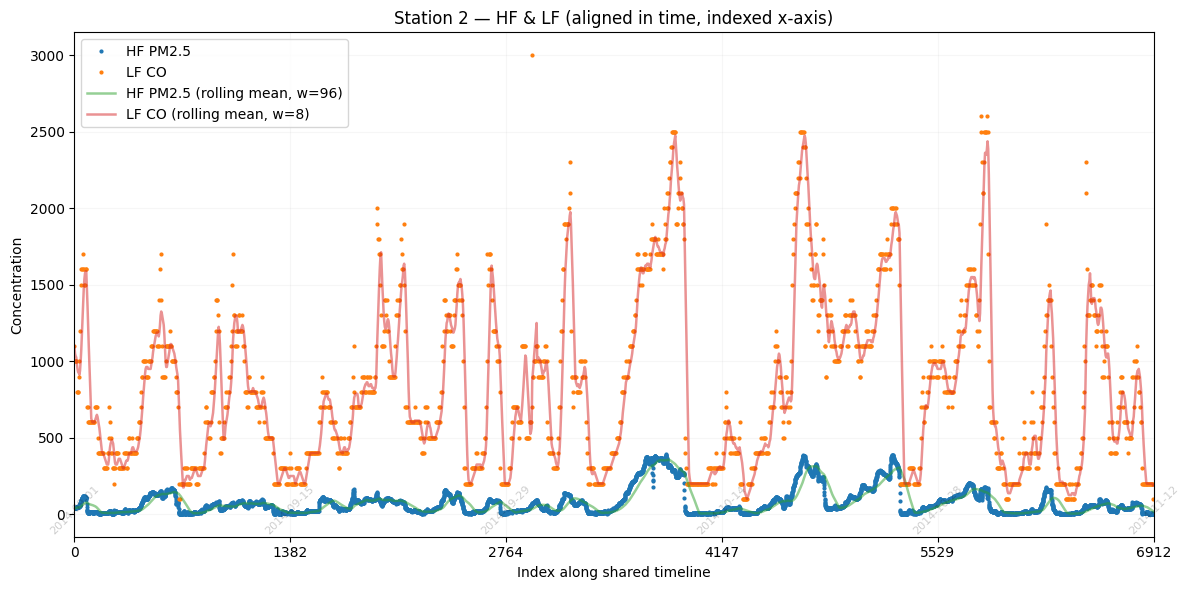

In [18]:
# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(hf_x, hf['PM2.5'], 'o', markersize=2, label='HF PM2.5')
plt.plot(lf_x, lf['CO'],    'o', markersize=2, label='LF CO')

# rolling mean lines on the same shared index (with transparency)
plt.plot(hf_x, hf_roll, linewidth=1.8, alpha=0.5,
         label=f'HF PM2.5 (rolling mean, w={hf_w})')
plt.plot(lf_x, lf_roll, linewidth=1.8, alpha=0.5,
         label=f'LF CO (rolling mean, w={lf_w})')

plt.xlabel('Index along shared timeline')
plt.ylabel('Concentration')
plt.title('Station 2 — HF & LF (aligned in time, indexed x-axis)')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# (Optional) show a few date labels without switching x to datetime
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
tick_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_positions)
for x, lbl in zip(tick_positions, tick_labels):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

plt.tight_layout()
plt.show()


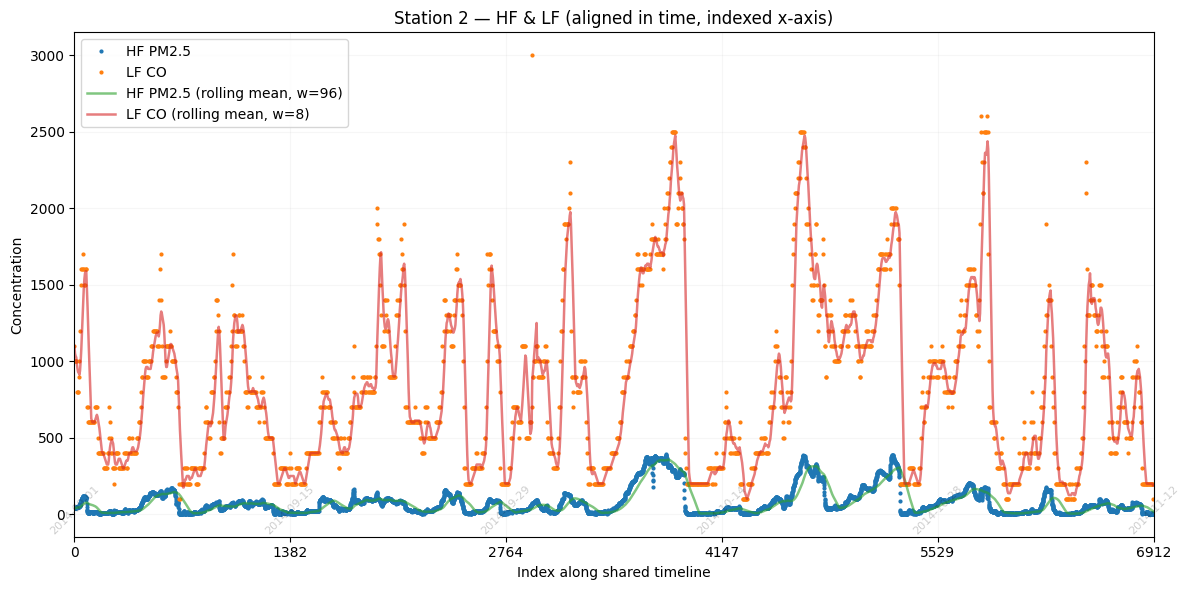

In [16]:
# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(hf_x, hf['PM2.5'], 'o', markersize=2, label='HF PM2.5')
plt.plot(lf_x, lf['CO'],    'o', markersize=2, label='LF CO')

# rolling mean lines on the same shared index (with transparency)
plt.plot(hf_x, hf_roll, linewidth=1.8, alpha=0.6,
         label=f'HF PM2.5 (rolling mean, w={hf_w})')
plt.plot(lf_x, lf_roll, linewidth=1.8, alpha=0.6,
         label=f'LF CO (rolling mean, w={lf_w})')

plt.xlabel('Index along shared timeline')
plt.ylabel('Concentration')
plt.title('Station 2 — HF & LF (aligned in time, indexed x-axis)')
plt.grid(alpha=0.1)
plt.margins(x=0)
plt.legend()

# (Optional) show a few date labels without switching x to datetime
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
tick_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
plt.xticks(tick_positions, tick_positions)
for x, lbl in zip(tick_positions, tick_labels):
    plt.text(x, plt.ylim()[0], lbl, ha='center', va='bottom',
             rotation=45, fontsize=8, alpha=0.2)

plt.tight_layout()
plt.show()


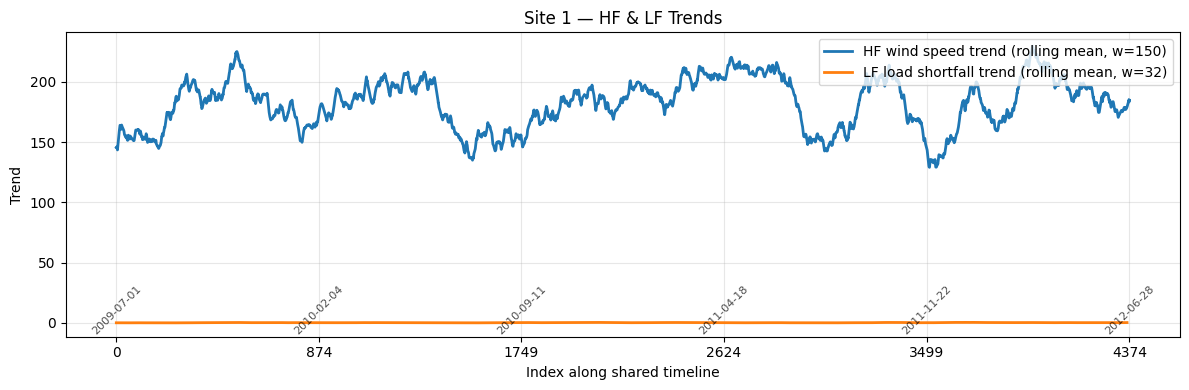

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load & parse ---
hf_path = '../src/TS_MTL/data/wind/wind-farm-2-hf.csv'
lf_path = '../src/TS_MTL/data/wind/wind-farm-2-lf.csv'
hf = pd.read_csv(hf_path, parse_dates=['Time']).sort_values('Time')
lf = pd.read_csv(lf_path, parse_dates=['Time']).sort_values('Time')

# --- Date filter ---
# min_date = pd.Timestamp("2015-01-01") #spain: "2015-01-01", "2016-05-14" 2014-09-01
# max_date = pd.Timestamp("2016-05-14")
# hf = hf[(hf['Time'] >= min_date) & (hf['Time'] <= max_date)]
# lf = lf[(lf['Time'] >= min_date) & (lf['Time'] <= max_date)]

# --- Shared time axis ---
time_union = np.sort(np.unique(np.concatenate([hf['Time'].values, lf['Time'].values])))
time_to_idx = {pd.Timestamp(t): i for i, t in enumerate(time_union)}
hf_x = hf['Time'].map(time_to_idx).to_numpy()
lf_x = lf['Time'].map(time_to_idx).to_numpy()

# --- Rolling means (centered) ---
hf_w, lf_w = 150, 32
hf_roll = hf['wd'].rolling(window=hf_w, min_periods=1, center=True).mean().to_numpy()
lf_roll = lf['wp'].rolling(window=lf_w, min_periods=1, center=True).mean().to_numpy()

# --- Plot trends only ---
plt.figure(figsize=(12, 4))
plt.plot(hf_x, hf_roll, linewidth=2, label=f'HF wind speed trend (rolling mean, w={hf_w})')
plt.plot(lf_x, lf_roll, linewidth=2, label=f'LF load shortfall trend (rolling mean, w={lf_w})')

plt.xlabel('Index along shared timeline')
plt.ylabel('Trend')
plt.title('Site 1 — HF & LF Trends')
plt.grid(alpha=0.3)
plt.legend(loc='upper right')

# Optional: index on axis + date annotations
tick_positions = np.linspace(0, len(time_union) - 1, 6, dtype=int)
plt.xticks(tick_positions, tick_positions)
date_labels = [pd.Timestamp(time_union[i]).strftime('%Y-%m-%d') for i in tick_positions]
ymin = plt.ylim()[0]
for x, lbl in zip(tick_positions, date_labels):
    plt.text(x, ymin, lbl, ha='center', va='bottom', rotation=45, fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()
